In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
from PIL import Image

In [22]:
logo = Image.open("/data/home/vadim/Projects/kmcuda/benchmarks/sourced_logo-02.png")

In [24]:
data = array(logo)

In [26]:
data = data.sum(axis=2)

In [28]:
data[data != 765] = 1
data[data == 765] = 0

In [35]:
data = data[1500:-1500]

In [37]:
data = data[100:-200]

In [39]:
data = data[:, 600:-600]

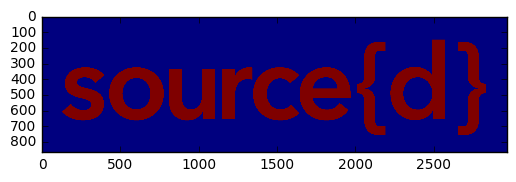

In [112]:
imshow(data)

In [41]:
data.shape

(867, 2967)

In [55]:
N = 2000000
seed(777)
space = concatenate((randint(0, data.shape[0], N)[:, newaxis], randint(0, data.shape[1], N)[:, newaxis]), axis=1)

In [68]:
uspace = zeros_like(data)
uspace[space[:, 0], space[:, 1]] = 1

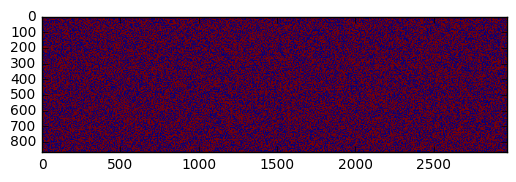

In [70]:
imshow(uspace)

In [71]:
dots = data * uspace

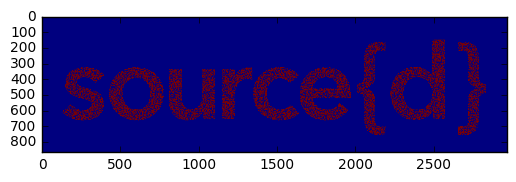

In [72]:
imshow(dots)

In [82]:
dataset = vstack(nonzero(dots)).T

In [84]:
dataset

array([[ 150, 2484],
       [ 150, 2485],
       [ 150, 2487],
       ..., 
       [ 758, 2696],
       [ 758, 2697],
       [ 758, 2700]])

In [86]:
dataset = dataset.astype(float32)

In [105]:
dataset.shape

(277944, 2)

In [85]:
import libKMCUDA

In [107]:
%time cents, asses = libKMCUDA.kmeans_cuda(dataset, 100, seed=777)

CPU times: user 751 ms, sys: 816 ms, total: 1.57 s
Wall time: 1.57 s


In [102]:
12 * dots.shape[0] / dots.shape[1]

3.506572295247725

In [106]:
%cd /data/home/vadim/Projects/kmcuda/

/data/home/vadim/Projects/kmcuda


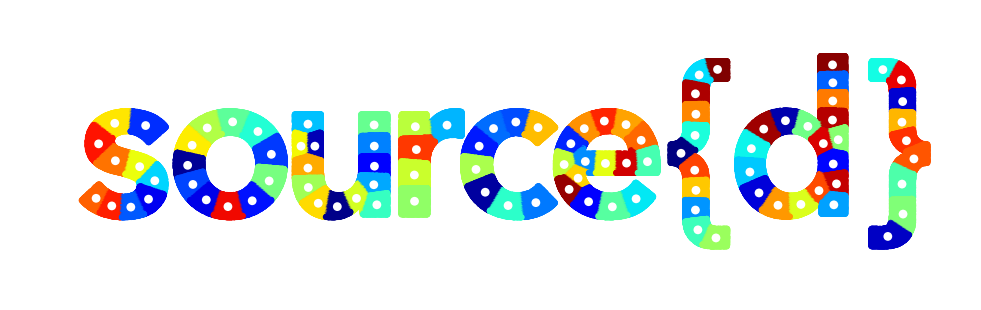

In [110]:
rcParams["figure.figsize"] = (12, 3.5)
scatter(dataset[:, 1], dots.shape[0] - dataset[:, 0], c=asses, edgecolors="none")
scatter(cents[:, 1], dots.shape[0] - cents[:, 0], c="white", s=40, edgecolors="none")
xlim((0, dots.shape[1]))
ylim((0, dots.shape[0]))
axis("off")
savefig("sourced.png", transparent=True, bbox_inches=0, pad_inches=0)